# Visualise ECFP values

A notebook for visualising ECFP values for the surfactants datasets.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from camcann.data.io import QinECFPData, QinDatasets

%matplotlib inline

In [2]:
data = QinECFPData(QinDatasets.QIN_ALL_RESULTS)
plot_df = data.featuriser.label_features(data.fingerprints)
plot_df.describe

<bound method NDFrame.describe of      Num [CH3]  Num [CH2]  Num [CH]  Num [OH]  Num [CH3][CH2]  \
0            1          8         1         2               1   
1            1          9         1         2               1   
2            1         13         1         2               1   
3            1          9         0         1               1   
4            1         13         0         1               1   
..         ...        ...       ...       ...             ...   
197          3         18         0         0               1   
198          1          9         1         0               1   
199          1         11         1         0               1   
200          3         14         0         0               1   
201          3         16         0         0               1   

     Num [CH3][CH2][CH2]  Num [CH2][CH2][CH2]  Num [CH2][CH2][CH]  \
0                      1                    5                   1   
1                      1                    5  

Let's reduce the number of environments we're looking at in the plot. Let's consider the top 20 most commonly occuring environments.

In [3]:
num_mol_occurances = (plot_df > 0).sum()
is_most_common = num_mol_occurances >= min(num_mol_occurances.nlargest(20))
plot_df = plot_df.loc[:, is_most_common]
plot_df.describe()

,Num [CH3],Num [CH2],Num [CH],Num [OH],Num [CH3][CH2],Num [CH3][CH2][CH2],Num [CH2][CH2][CH2],Num [CH][OH],Num [CH][CH2][OH],Num [CH2][OH],Num [CH3][CH2][CH2][CH2],Num [CH3][CH2][CH2][CH2][CH2],Num [CH2][CH2][CH2][CH2][CH2],Num [O],Num [CH2][CH2][O],Num [C],Num [O],Num [C]=[O],Num [CH][CH]([CH])[OH],Num [Br-]
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,1.767327,13.366337,2.262376,2.153465,1.014851,1.064356,7.217822,1.430693,0.445545,0.717822,0.896040,0.866337,5.252475,2.004950,2.955446,0.420792,0.707921,0.420792,0.970297,0.331683
std,1.312141,7.266392,3.572347,2.778957,0.594148,0.705922,3.991543,2.198518,0.704996,0.715555,0.321817,0.341136,3.465626,3.059115,6.104643,0.627847,0.981843,0.627847,1.733231,0.471988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,9.000000,0.000000,0.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,12.000000,0.000000,1.000000,1.000000,1.000000,8.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,16.000000,3.000000,4.000000,1.000000,1.000000,10.000000,3.000000,1.000000,1.000000,1.000000,1.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,6.000000,57.000000,18.000000,13.000000,5.000000,6.000000,18.000000,11.000000,3.000000,3.000000,2.000000,1.000000,14.000000,21.000000,42.000000,3.000000,4.000000,3.000000,10.000000,1.000000


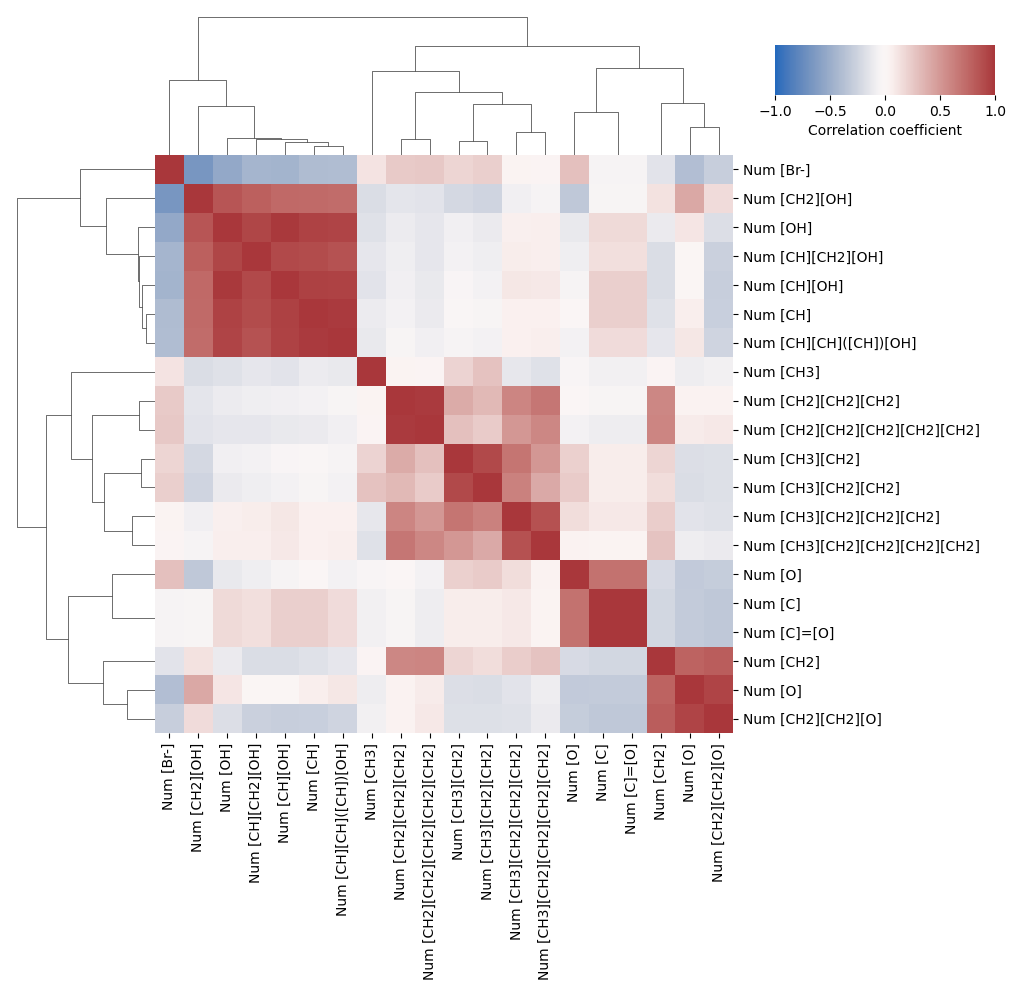

In [4]:
sns.clustermap(
    plot_df.corr(),
    cmap="vlag",
    metric=lambda u, v: np.sqrt((abs(u) - abs(v))**2).sum(),
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Correlation coefficient", "orientation": "horizontal"},
    cbar_pos=(0.78, 0.9, 0.22, 0.05),
)
